In [25]:
# LOAD CMU COCA ARRAY AND FORMAT
import numpy as np
import time as time
cmu_coca_txt = open("/Users/TaraD/LING_Research/cmu_coca.txt", 'r')
cmu_coca = cmu_coca_txt.readlines()#.split('\n\n')
print(np.shape(cmu_coca))
#print(COCA[:100], COCA[204100:204150])
print(type(cmu_coca))
print(cmu_coca[:10])
cmu_coca_txt.close()
word_pron_count = []
for i in range(len(cmu_coca)):
    line = cmu_coca[i]
    linelist = line.strip().split(',')
    word_pron_count.append(linelist)
    #print(linelist)
word_pron_count = np.array(word_pron_count)
print("done",word_pron_count[:15])

(64037,)
<class 'list'>
["'CAUSE,K @.0 Z,0.0\n", "'COURSE,K owr.1 R S,0.0\n", "'END-INNER-QUOTE,e.1 N D i.1 N *hr.0 K W ow.1 T,0.0\n", "'END-QUOTE,e.1 N D K W ow.1 T,0.0\n", "'INNER-QUOTE,i.1 N *hr.0 K W ow.1 T,0.0\n", "'M,@.0 M,0.0\n", "'N,@.0 N,0.0\n", "'QUOTE,K W ow.1 T,0.0\n", "'SINGLE-QUOTE,S i.1 NG G @.0 L K W ow.1 T A @.0,0.0\n", 'A,@.0,9899789\n']
done [["'CAUSE" 'K @.0 Z' '0.0']
 ["'COURSE" 'K owr.1 R S' '0.0']
 ["'END-INNER-QUOTE" 'e.1 N D i.1 N *hr.0 K W ow.1 T' '0.0']
 ["'END-QUOTE" 'e.1 N D K W ow.1 T' '0.0']
 ["'INNER-QUOTE" 'i.1 N *hr.0 K W ow.1 T' '0.0']
 ["'M" '@.0 M' '0.0']
 ["'N" '@.0 N' '0.0']
 ["'QUOTE" 'K W ow.1 T' '0.0']
 ["'SINGLE-QUOTE" 'S i.1 NG G @.0 L K W ow.1 T A @.0' '0.0']
 ['A' '@.0' '9899789']
 ['A' 'eyF.1' '9899789']
 ["A'IGHT" 'ay0.1 T' '11']
 ["A'S" 'ey.1 Z' '2252']
 ['A-' 'o.1' '2375']
 ['A-' 'ae.1' '2375']]


In [81]:
# CREATING T_NT_ARRAY OF UNIQUE TRANSCRIPTIONS (NO HOMOPHONES)
t0 = time.time()
word_pron_count2 = word_pron_count
#T_Nt_list = []#['Transcription', 'Count Sum', 'Homophone Count', 'Homophone Info']
for i in range(51406,len(word_pron_count[:])):
    if i%100 == 0:
        print(i)
    word = word_pron_count[i,0]
    trans = word_pron_count[i,1]
    count = word_pron_count[i,2]
    #if len(T_Nt_list) > 1:
    #print((np.array(T_Nt_list)))
    if not any(trans in x for x in np.array(T_Nt_list)):#trans not in (np.array(T_Nt_list)):
        indices = np.where(word_pron_count==trans)[0]
        #print(indices)

        if len(indices) == 1:
            list1 = [trans, count.astype(float), 1, word+':'+count]

        else:
            arr = word_pron_count[indices,:]
            words = word_pron_count[indices,0]
            counts = word_pron_count[indices,2]
            term = np.apply_along_axis(lambda d: d[0]+':'+d[2], 1,arr)
            info = (','.join(term))
            homophone_count = len(indices)
            count_sum = sum(counts.astype(float))
            list1 = [trans, count_sum, homophone_count, info]
    else:
        #print('skipped', trans)
        continue
    
    T_Nt_list.append(list1)
T_Nt_array = np.array(T_Nt_list)
#for line in T_Nt_array:
    #print(line)    
        
print(len(T_Nt_array))
print("time=", time.time()-t0)
np.savetxt('Trans_count_info.txt', T_Nt_array, fmt = '%s', delimiter = ',')
        
    

51500
51600
51700
51800
51900
52000
52100
52200
52300
52400
52500
52600
52700
52800
52900
53000
53100
53200
53300
53400
53500
53600
53700
53800
53900
54000
54100
54200
54300
54400
54500
54600
54700
54800
54900
55000
55100
55200
55300
55400
55500
55600
55700
55800
55900
56000
56100
56200
56300
56400
56500
56600
56700
56800
56900
57000
57100
57200
57300
57400
57500
57600
57700
57800
57900
58000
58100
58200
58300
58400
58500
58600
58700
58800
58900
59000
59100
59200
59300
59400
59500
59600
59700
59800
59900
60000
60100
60200
60300
60400
60500
60600
60700
60800
60900
61000
61100
61200
61300
61400
61500
61600
61700
61800
61900
62000
62100
62200
62300
62400
62500
62600
62700
62800
62900
63000
63100
63200
63300
63400
63500
63600
63700
63800
63900
64000
57712
time= 5582.671846151352


In [142]:
list1 = []
list2 = []
list3 = []
list4 = []
for line in word_pron_count:
    if line[0] not in list1:
        list1.append(line[0])
        list3.append(line[2])
    elif line[0] in list1:
        list2.append(line[2].astype(float))
        list4.append([line[0],line[2].astype(float)])
print(sum(list2))
print(list4)

        

218063505.0
[['A', 9899789.0], ['A-', 2375.0], ['A-', 2375.0], ['A-', 2375.0], ['A-', 2375.0], ['A-', 2375.0], ['A-', 2375.0], ['AB', 456.0], ['AB-', 15.0], ['AB-', 15.0], ['ABBE', 525.0], ['ABDOMEN', 1668.0], ['ABDOMINAL', 1509.0], ['ABDUCTED', 1240.0], ['ABDUCTING', 116.0], ['ABDUCTION', 1138.0], ['ABDUCTIONS', 290.0], ['ABDUCTOR', 121.0], ['ABDUCTORS', 144.0], ['ABLER', 21.0], ['ABS', 1926.0], ['ABSOLVE', 224.0], ['ABSOLVED', 196.0], ['ABSOLVES', 76.0], ['ABSOLVING', 75.0], ['ABSORPTION', 2146.0], ['ABSTAIN', 437.0], ['ABSTAINED', 217.0], ['ABSTAINING', 171.0], ['ABSTENTION', 151.0], ['ABSTENTIONS', 68.0], ['ABSTRACT', 8246.0], ['ABT', 136.0], ['ABUSE', 25646.0], ['ABUSES', 3482.0], ['AC-', 27.0], ['ACADEMICIANS', 229.0], ['ACCENT', 5806.0], ['ACCEPT', 26024.0], ['ACCEPTABLE', 9346.0], ['ACCEPTANCE', 8757.0], ['ACCEPTED', 21226.0], ['ACCEPTING', 6106.0], ['ACCIDENTAL', 2588.0], ['ACCIDENTALLY', 2982.0], ['ACCOMPANIMENT', 978.0], ['ACCOMPANIMENTS', 293.0], ['ACCOUNTABILITY', 6079.0],

In [145]:
with open('list_multiple.txt', 'w')


'np.array(list4))' was not found in history, as a file, url, nor in the user namespace.


In [139]:
len(list2)

4519

In [82]:
print(i,trans)
print(time.time()-t0)
print(list1)
print(T_Nt_list[-10:])

64036 Z ay.1 G ow.0 T
7581.481479167938
['Z ay.1 G ow.0 T', 95.0, 1, 'ZYGOTE:95']
[['Z o.1 S T *hr.0', 40.0, 1, 'ZOSTER:40'], ['Z Tuw.0 K iy.1 N iy.0', 1681.0, 1, 'ZUCCHINI:1681'], ['Z uwL.1 L Tuw.2', 991.0, 1, 'ZULU:991'], ['Z uwL.1 L Tuw.0 Z', 249.0, 1, 'ZULUS:249'], ['Z Tuw.1 P @.0 N', 19.0, 1, 'ZUPAN:19'], ['Z uwr.1 R i.0 K', 897.0, 1, 'ZURICH:897'], ['Z ay.1 D @.0 K owF.2', 190.0, 1, 'ZYDECO:190'], ['Z ay.2 D e.1 K owF.2', 190.0, 1, 'ZYDECO:190'], ['Z i.1 D @.0 K owF.2', 190.0, 1, 'ZYDECO:190'], ['Z ay.1 G ow.0 T', 95.0, 1, 'ZYGOTE:95']]


In [83]:
# CREATING VOWEL PHONEME LIST FROM ARRAY 

trans_list = T_Nt_array[:,0]
vowel_list = []
for trans in trans_list:
    phonemes = trans.split(' ')
    #print(phonemes)
    for phoneme in phonemes:
        if phoneme.islower()==True or (not phoneme.islower() and not phoneme.isupper())== True: 
            if phoneme not in vowel_list:
            #print(phoneme)
                vowel_list.append(phoneme)
print(vowel_list)
vowel_list_stressed = []
vowel_phoneme_list = []
for vowel in vowel_list:
    print(vowel)
    print(vowel[-1:])
    if vowel[-1:] == '1':
        vowel_list_stressed.append(vowel)
        vowel_phoneme_list.append(vowel[:-2])
        
print(vowel_list_stressed)
print(vowel_phoneme_list, len(vowel_phoneme_list))


['@.0', 'owr.1', 'e.1', 'i.1', '*hr.0', 'ow.1', 'eyF.1', 'ay0.1', 'ey.1', 'o.1', 'ae.1', 'uh.1', 'oh.1', 'ahr.1', 'ahr.2', 'iy.2', 'iy.1', 'ae.2', 'iy.0', 'aeh.1', 'i.0', 'ae.0', 'ey.2', 'uh.2', 'e.2', 'ay.1', 'e.0', 'Tuw.1', 'owr.0', 'aeBR.1', 'owF.0', 'ow.0', 'aw.1', 'i.2', 'o.2', 'owr.2', 'Tuw.2', '*hr.1', 'uw.1', 'o.0', 'uw.0', 'ey.0', 'ay.2', 'uw.2', 'eyr.1', 'ow.2', 'owL.1', 'uwr.1', 'owF.1', 'ay0.2', 'iyr.2', 'owF.2', 'oy.2', 'iyr.1', 'oy.1', 'u.2', '*hr.2', 'ay.0', 'Tuw.0', 'u.1', 'oh.2', 'ah.1', 'eyr.2', 'aw.2', 'eyF.2', 'oh.0', 'eyF.0', 'u.0', 'uwr.0', 'uh.0', 'ay0.0', 'oy.0', 'ahr.0', 'iyr.0', 'eyr.0', 'aw.0', 'uwL.1', 'uwr.2', 'ah.2']
@.0
0
owr.1
1
e.1
1
i.1
1
*hr.0
0
ow.1
1
eyF.1
1
ay0.1
1
ey.1
1
o.1
1
ae.1
1
uh.1
1
oh.1
1
ahr.1
1
ahr.2
2
iy.2
2
iy.1
1
ae.2
2
iy.0
0
aeh.1
1
i.0
0
ae.0
0
ey.2
2
uh.2
2
e.2
2
ay.1
1
e.0
0
Tuw.1
1
owr.0
0
aeBR.1
1
owF.0
0
ow.0
0
aw.1
1
i.2
2
o.2
2
owr.2
2
Tuw.2
2
*hr.1
1
uw.1
1
o.0
0
uw.0
0
ey.0
0
ay.2
2
uw.2
2
eyr.1
1
ow.2
2
owL.1
1
uwr.1
1
o

In [218]:
string = " K ow.1 R S"
print(string)
print((string.replace(' '+'ow.1', ' '+'ah.1',1)).lstrip())

 K ow.1 R S
K ah.1 R S


V= ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Ntot= 621067731.0
vi= owr
vi, V_altered: owr ['e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
vi= e
vi, V_altered: e ['owr', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
vi= i
vi, V_altered: i ['owr', 'e', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
vi= ow
vi, V_altered: ow ['owr', 'e', 'i', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr'

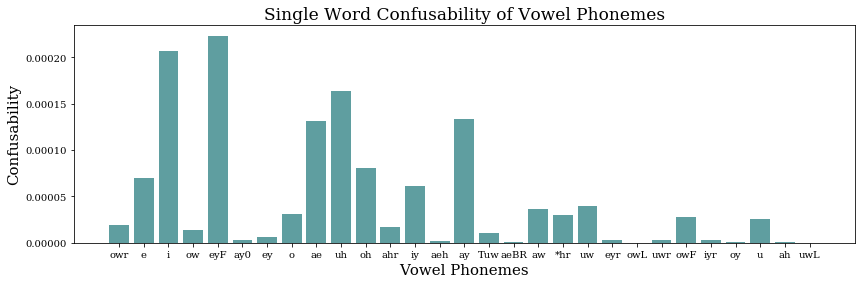

{'owr': 1.8840674003146757e-05, 'e': 6.955738195200302e-05, 'i': 0.0002068925764453143, 'ow': 1.357427037599711e-05, 'eyF': 0.0002232350914372895, 'ay0': 3.3397778396998114e-06, 'ey': 5.7284299956700265e-06, 'o': 3.055315493285647e-05, 'ae': 0.0001309432732519317, 'uh': 0.00016379902227800757, 'oh': 8.101595249134636e-05, 'ahr': 1.662543648443592e-05, 'iy': 6.071358889913326e-05, 'aeh': 1.728068623696891e-06, 'ay': 0.00013396414548465067, 'Tuw': 1.0104003344851348e-05, 'aeBR': 1.3715015121640424e-06, 'aw': 3.634390708316492e-05, '*hr': 2.9700325772773297e-05, 'uw': 3.9534854859375024e-05, 'eyr': 2.5513380580168613e-06, 'owL': 2.371524646022583e-07, 'uwr': 2.75629216152444e-06, 'owF': 2.7306827455652e-05, 'iyr': 2.694144602380005e-06, 'oy': 1.323134655864604e-06, 'u': 2.5861397537434854e-05, 'ah': 4.706131611209592e-07, 'uwL': 1.292981229558535e-07}


In [221]:
# CONFUSABILITY FULL


V = vowel_phoneme_list
C_full = np.zeros((len(V))) # Confusability Matrix
T = T_Nt_array[:,0]
print("V=",V)

# CALCULATING NTOT
Ntot_list = []
for i in range(len(T)):
    t = T[i]  #transcription
    Nt = float(T_Nt_array[i,1])
    Ntot_list.append(Nt)
Ntot = float(sum(Ntot_list))
print("Ntot=", Ntot)


t0 = time.time()
# CONFUSABILITY CALCULATION
for i in range(len(V)):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi, V_altered:", vi, V_altered)
    
    # FIRST SUM
    Tlist_to_sum = []
    for n in range(len(T[:])):
        t = T[n]  #transcription
        t_alt = ' '+ t
        if vi_1 in (t_alt):
            d = 1
        else:
            continue
        Nt = float(T_Nt_array[n,1]) #token count of transcription in COCA
        coeff = (d*Nt)/Ntot
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            t_vj = (t_alt.replace(vi_1, vj_1, 1)).lstrip()
            #print("t_vj is:",t_vj,"t is:",t)
            if t_vj in T:
                index = [i for i in range(len(T)) if T[i]==t_vj]
                Nt_vj = T_Nt_array[index,1].astype(float)[0] #float
                #print(t,t_vj)#,Nt_vj, type(Nt_vj))
            else:
                Nt_vj = 0
            inner_term = Nt_vj/(Ntot)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        Tlist_to_sum.append(term)
    SumT = sum(Tlist_to_sum)
    C_full[i] = SumT
print("Confusability = ", C_full)
print("time=", time.time()-t0)

# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_full, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()

#SAVING CONFUSABILITY TO FILE 
C_dict_full = {}
for i in range(29):
    C_dict_full[V[i]]= C_full[i]
print(np.array(C_dict_full))

text = open("Confus_Single_Words_full.txt", "w")
for k, v in C_dict_full.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()


## Analyzing Results:

(30,)
<class 'list'>
[['owr' '1.8840674003146757e-05']
 ['e' '6.955738195200302e-05']
 ['i' '0.0002068925764453143']
 ['ow' '1.357427037599711e-05']
 ['eyF' '0.0002232350914372895']
 ['ay0' '3.3397778396998114e-06']
 ['ey' '5.7284299956700265e-06']
 ['o' '3.055315493285647e-05']
 ['ae' '0.0001309432732519317']
 ['uh' '0.00016379902227800757']
 ['oh' '8.101595249134636e-05']
 ['ahr' '1.662543648443592e-05']
 ['iy' '6.071358889913326e-05']
 ['aeh' '1.728068623696891e-06']
 ['ay' '0.00013396414548465067']
 ['Tuw' '1.0104003344851348e-05']
 ['aeBR' '1.3715015121640424e-06']
 ['aw' '3.634390708316492e-05']
 ['*hr' '2.9700325772773297e-05']
 ['uw' '3.9534854859375024e-05']
 ['eyr' '2.5513380580168613e-06']
 ['owL' '2.371524646022583e-07']
 ['uwr' '2.75629216152444e-06']
 ['owF' '2.7306827455652e-05']
 ['iyr' '2.694144602380005e-06']
 ['oy' '1.323134655864604e-06']
 ['u' '2.5861397537434854e-05']
 ['ah' '4.706131611209592e-07']
 ['uwL' '1.292981229558535e-07']]


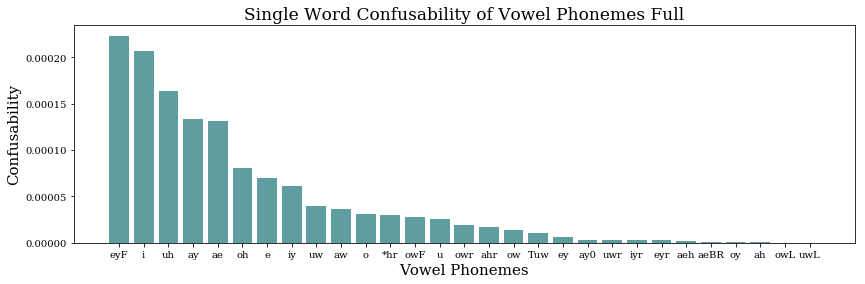

In [223]:
# LOADING CONFUSABILITY FILE AND MAKING BAR GRAPH
C_file = open("/Users/TaraD/LING_Research/Confus_Single_Words_full.txt", 'r')
Confus = C_file.read().split('\n\n')
print(np.shape(Confus))
print(type(Confus))
#print(Confus)
Confus_list = []
for i in Confus[:-1]:
    list1 = (i.split(' : '))
    list2 = [list1[0], float(list1[1])]
    Confus_list.append(list2)
Confus_array = (np.array(Confus_list))

#for i in Confus_array:
    #print(len(i),i)
print(Confus_array)

import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.edgecolor'] = 'b'
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize = (14,4))
#C_sorted = sorted(C)[::-1]
ind = np.argsort(Confus_array[:,1].astype(float))
x = np.take_along_axis(Confus_array[:,0],ind, axis=0)
y = np.take_along_axis(Confus_array[:,1].astype(float),ind, axis=0)

plt.bar(x[::-1], y[::-1], .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes Full", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()


In [224]:
# LOADING STABILIZING, DIRECTIONAL SELECTION, CONFUSABILITY 
import csv
import numpy as np

file = open('/Users/TaraD/LING_Research/stabSel.csv')
data = np.array(list(csv.reader(file)))
#print(data)
stabsel = []
for i in range(len(data)):
    line = data[i]
    if len(line)!=0:
        if i != 0:
            linelist = [line[0], float(line[1]), float(line[2]), float(line[3])]
            #print('yes')
        else:
            linelist = line
        stabsel.append(line)
stabsel = np.array(stabsel)
print(stabsel)
print(len(stabsel))

file2 = open('/Users/TaraD/LING_Research/DriveRate.csv')
data2 = np.array(list(csv.reader(file2)))
#print(data)
driverate = []
for i in range(len(data2)):
    #print(i)
    line = data2[i]
    if len(line)!=0:
        if i != 0:
            linelist = [line[0], float(line[1]), float(line[2]), float(line[3])]
            #print('yes')
        else:
            linelist = line
        driverate.append(linelist)
driverate = np.array(driverate)
print(driverate)
print(len(driverate))

dr_sorted = driverate[driverate[:,1].argsort()]
print("dr_sorted", dr_sorted)

C_file = open("/Users/TaraD/LING_Research/Confus_Single_Words_full.txt", 'r')
Confus = C_file.read().split('\n\n')
print(np.shape(Confus))
print(type(Confus))
#print(Confus)
Confus_list = []
for i in Confus[:-1]:
    list1 = (i.split(' : '))
    list2 = [list1[0], float(list1[1])]
    Confus_list.append(list2)
Confus_array = (np.array(Confus_list))

#for i in Confus_array:
    #print(len(i),i)
print(Confus_array)

for i in Confus_array:
    if i[0] not in stabsel:
        print(i[0], type(i[1]))
    


[['phoneme' 'stabilizing selection' 'lower bnd' 'upper bnd']
 ['uw' '13.636400899858485' '9.210792265480277' '16.90835643606694']
 ['aeh' '13.697106397799441' '11.64510550582704' '17.050634528119943']
 ['aw' '19.69407509716783' '17.0158983967353' '24.838335990592338']
 ['uwr' '20.359795260022484' '17.35986481610161' '25.918782266065016']
 ['ow' '21.11100925041852' '16.234208146851042' '26.11264714418392']
 ['uwL' '21.23402030878595' '17.19283517641174' '28.975874547308305']
 ['ae' '21.51452380050494' '17.69692104085476' '28.52816151834189']
 ['owF' '24.76243931511119' '18.818207904156704' '29.71031783559979']
 ['owr' '25.38148667307494' '20.27900396544852' '33.06767821166629']
 ['iyr' '25.509389976538078' '20.375098458892754' '32.11816354771334']
 ['oh' '26.314244547769196' '22.095770730585357' '33.59972878239642']
 ['u' '26.56493991349603' '22.647995870631163' '33.10757811975511']
 ['ahr' '27.355052842248856' '20.451415405537066' '35.263215941830026']
 ['oy' '27.37855579285627' '22.31

(2, 26) (26,)


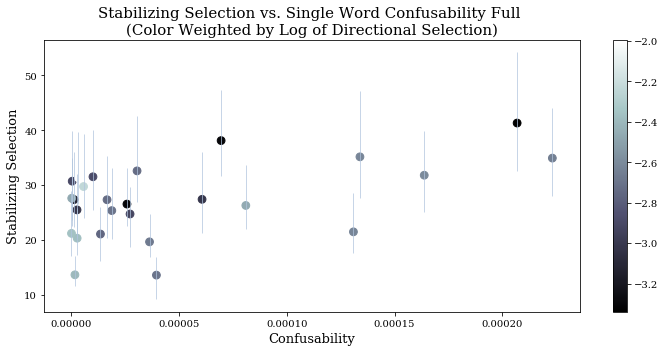

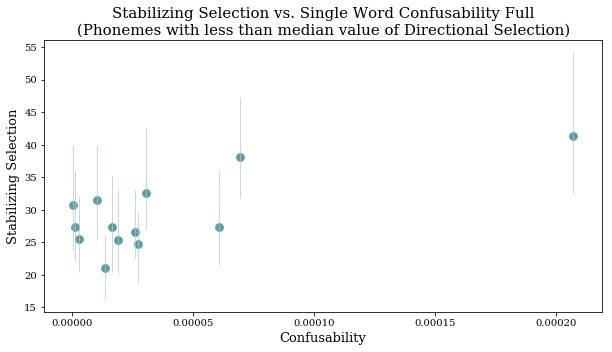

In [225]:
#PLOTTING STABILIZING SELECTION AND CONFUSABILITY ETC
stabsel_values = stabsel[1:,1:].astype(float)
#print(stabsel_values)
Confus_values = Confus_array[:,1].astype(float)
dr_values = driverate[1:,1:].astype(float)
#print(dr_values)
y = stabsel_values[:,0]
yl = stabsel_values[:,1]
y2 = stabsel_values[:,2]
yerr = stabsel_values[:,1:]
#print(yerr)
yerr1=yerr
yerr1[:,0] = yerr[:,0]-y[:]
yerr1[:,1] = yerr[:,1]-y[:]
yerr1 = yerr1.T
print(np.shape(yerr1), np.shape(z))
#print(yerr1)
#print(len(stabsel_values), len(y))
#print(stabsel_values, y)
x = np.zeros((len(y)))
z = np.zeros((len(y)))
for i in range(0,len(y)):
    phoneme = stabsel[i+1,0]
    index = np.where(Confus_array[:,0]==phoneme)[0]
    index_dr = np.where(driverate[:,0]==phoneme)[0]
    
    #print(index)
    x[i] = Confus_values[index]
    z[i] = dr_values[index_dr-1,0]
z_median = np.median(z)
x_masked = x[z < z_median]
z_masked = z[z < z_median]
y_masked = y[z < z_median]
yerr1_masked = (yerr1.T[z < z_median]).T
#x = np.array(x)
#print(y)
#print(x)
#print(z)
#print(min(x), max(x), min(y), max(y))
#print(yerr1)
#print(np.shape(yerr1))
plt.figure(figsize=(12,5))
plt.errorbar(x,y, yerr=abs(yerr1), linestyle="None", c = 'lightsteelblue', elinewidth=.7)
plt.scatter(x,y, c = np.log10(z), cmap = 'bone', s=60)
plt.colorbar()
plt.title('Stabilizing Selection vs. Single Word Confusability Full \n(Color Weighted by Log of Directional Selection)', fontsize = 15)
#print("yerr1[1]", yerr1)
plt.xlabel('Confusability', fontsize=13)
plt.ylabel('Stabilizing Selection', fontsize=13)
#plt.ylim()
plt.show()

plt.figure(figsize=(10,5))
plt.errorbar(x_masked,y_masked, yerr=abs(yerr1_masked), linestyle="None", c = 'lightsteelblue', elinewidth=.7)
plt.scatter(x_masked,y_masked, c = 'cadetblue', s=60)
#plt.colorbar()
plt.title('Stabilizing Selection vs. Single Word Confusability Full\n(Phonemes with less than median value of Directional Selection)', fontsize = 15)
#print("yerr1[1]", yerr1)
plt.xlabel('Confusability', fontsize=13)
plt.ylabel('Stabilizing Selection', fontsize=13)
#plt.ylim()
plt.show()



## Alternate Confusability with only 1 trans per word

In [174]:
def stressed_v(trans):
    if '.1'in trans:
        return True
    else:
        return False
#print(stressed_v('Z Tuw.0 K iy.1 N iy.0'))

t0 = time.time()
check=0
word_pron_count_reduced = []
for i in range(len(word_pron_count[:])):
    if i%100 == 0:
        print(i)
    
    word = word_pron_count[i,0]
    trans = word_pron_count[i,1]
    count = word_pron_count[i,2]
    line = [word,trans,count]
    if i != 0:
        #print(i)
        prev_word = word_pron_count_reduced[-1][0]
        prev_trans = word_pron_count_reduced[-1][1]

        if word != prev_word:
            word_pron_count_reduced.append(line)

        elif stressed_v(prev_trans)==False and stressed_v(trans)==True:
            word_pron_count_reduced.pop()
            word_pron_count_reduced.append(line)
        else:
            continue
    else:
        word_pron_count_reduced.append(line)
print("reduced",word_pron_count[0:100])
word_pron_count_reduced = np.array(word_pron_count_reduced)
print("reduced:",word_pron_count_reduced[0:100])
print(len(word_pron_count), len(word_pron_count_reduced))


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [176]:
# MAKING REDUCED T_NT_ARRAY WITH NO REPEAT WORDS
t0 = time.time()

T_Nt_list_reduced = []#['Transcription', 'Count Sum', 'Homophone Count', 'Homophone Info']
check = 0
for i in range(len(word_pron_count_reduced[:])):
    if i%100 == 0:
        print(i)
    word = word_pron_count_reduced[i,0]
    trans = word_pron_count_reduced[i,1]
    count = word_pron_count_reduced[i,2]
    #if word!=check:
    #if len(T_Nt_list) > 1:
    #print((np.array(T_Nt_list)))
    if not any(trans in x for x in np.array(T_Nt_list_reduced)):#trans not in (np.array(T_Nt_list)):
        indices = np.where(word_pron_count_reduced==trans)[0]
        #print(indices)

        if len(indices) == 1:
            list1 = [trans, count.astype(float), 1, word+':'+count]

        else:
            arr = word_pron_count_reduced[indices,:]
            words = word_pron_count_reduced[indices,0]
            counts = word_pron_count_reduced[indices,2]
            term = np.apply_along_axis(lambda d: d[0]+':'+d[2], 1,arr)
            info = (','.join(term))
            homophone_count = len(indices)
            count_sum = sum(counts.astype(float))
            list1 = [trans, count_sum, homophone_count, info]
    else:
        #print('skipped', trans)
        continue
    
    T_Nt_list_reduced.append(list1)
T_Nt_array_reduced = np.array(T_Nt_list_reduced)
#for line in T_Nt_array_reduced:
    #print(line)    
        
print(len(T_Nt_array_reduced))
print("time=", time.time()-t0)
np.savetxt('Trans_count_info_reduced.txt', T_Nt_array_reduced, fmt = '%s', delimiter = ',')
        
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

V= ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Ntot_reduced= 402886247.0
vi= owr
vi, V_altered: owr ['e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
vi= e
vi, V_altered: e ['owr', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
vi= i
vi, V_altered: i ['owr', 'e', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
vi= ow
vi, V_altered: ow ['owr', 'e', 'i', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF

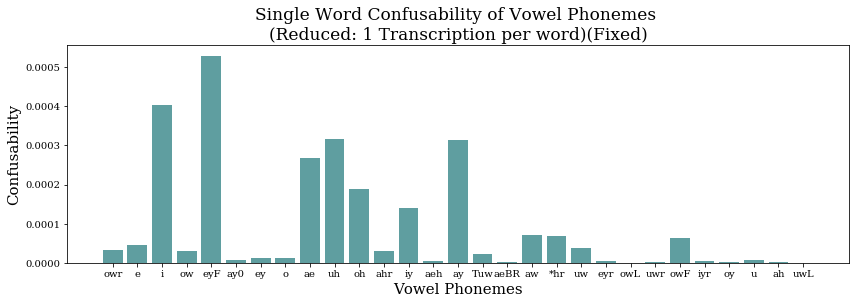

{'owr': 3.3895494403412924e-05, 'e': 4.5383677262085866e-05, 'i': 0.0004034778060794058, 'ow': 3.018579541238269e-05, 'eyF': 0.0005291078610889132, 'ay0': 7.860587545940087e-06, 'ey': 1.1538792185934013e-05, 'o': 1.1639426354331683e-05, 'ae': 0.00026694355989312623, 'uh': 0.0003155270454164809, 'oh': 0.00018865421845384696, 'ahr': 2.9476178301801777e-05, 'iy': 0.0001394295646331742, 'aeh': 3.740806956412297e-06, 'ay': 0.0003128321810048795, 'Tuw': 2.2958928109614755e-05, 'aeBR': 1.892260741544812e-06, 'aw': 6.985139605788162e-05, '*hr': 6.926883024051978e-05, 'uw': 3.769437920721768e-05, 'eyr': 4.959961441363457e-06, 'owL': 5.59624115854291e-07, 'uwr': 1.814961097255948e-06, 'owF': 6.418722438602025e-05, 'iyr': 3.9857083097457754e-06, 'oy': 3.108511463134766e-06, 'u': 7.48688195534612e-06, 'ah': 1.0704033441501946e-06, 'uwL': 3.008776319337724e-07}


In [227]:
# NEW CONFUSABILITY_REDUCED Fixed e.1 issue

V = vowel_phoneme_list
C_reduced = np.zeros((len(V))) # Confusability Matrix
T = T_Nt_array_reduced[:,0]
print("V=",V)

# CALCULATING NTOT
Ntot_list_reduced = []
for i in range(len(T)):
    t = T[i]  #transcription
    Nt = float(T_Nt_array_reduced[i,1])
    Ntot_list_reduced.append(Nt)
Ntot_reduced = float(sum(Ntot_list_reduced))
print("Ntot_reduced=", Ntot_reduced)


t0 = time.time()
# CONFUSABILITY CALCULATION
for i in range(len(V)):
    vi = V[i]
    print("vi=",vi)
    vi_1 = ' ' + vi + '.1'
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi, V_altered:", vi, V_altered)
    
    # FIRST SUM
    Tlist_to_sum_reduced = []
    for n in range(len(T[:])):
        t = T[n]  #transcription
        t_alt = ' ' + t
        if vi_1 in t_alt:
            d = 1
        else:
            continue
        Nt = float(T_Nt_array_reduced[n,1]) #token count of transcription in COCA
        coeff = (d*Nt)/Ntot_reduced
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = ' ' + vj + '.1'
            t_vj = (t_alt.replace(vi_1, vj_1, 1)).lstrip()
            if t_vj in T:
                index = [i for i in range(len(T)) if T[i]==t_vj]
                Nt_vj = T_Nt_array_reduced[index,1].astype(float)[0] #float
                #print(t,t_vj,Nt_vj, type(Nt_vj))
            else:
                Nt_vj = 0
            inner_term = Nt_vj/(Ntot_reduced)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        Tlist_to_sum_reduced.append(term)
    SumT_reduced = sum(Tlist_to_sum_reduced)
    C_reduced[i] = SumT_reduced
print("Confusability = ", C_reduced)
print("time=", time.time()-t0)

# INITIAL CONFUSABILITY PLOT
plt.figure(figsize = (14,4))
plt.bar(V,C_reduced, .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes \n(Reduced: 1 Transcription per word)(Fixed)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()

#SAVING CONFUSABILITY TO FILE 
C_dict_reduced = {}
for i in range(len(V)):
    C_dict_reduced[V[i]]= C_reduced[i]
print(np.array(C_dict_reduced))

text = open("Confus_Single_Words_reduced.txt", "w")
for k, v in C_dict_reduced.items():
    text.write(str(k) + ' : '+str(v)+'\n\n')
text.close()

(30,)
<class 'list'>
[['owr' '3.3895494403412924e-05']
 ['e' '4.5383677262085866e-05']
 ['i' '0.0004034778060794058']
 ['ow' '3.018579541238269e-05']
 ['eyF' '0.0005291078610889132']
 ['ay0' '7.860587545940087e-06']
 ['ey' '1.1538792185934013e-05']
 ['o' '1.1639426354331683e-05']
 ['ae' '0.00026694355989312623']
 ['uh' '0.0003155270454164809']
 ['oh' '0.00018865421845384696']
 ['ahr' '2.9476178301801777e-05']
 ['iy' '0.0001394295646331742']
 ['aeh' '3.740806956412297e-06']
 ['ay' '0.0003128321810048795']
 ['Tuw' '2.2958928109614755e-05']
 ['aeBR' '1.892260741544812e-06']
 ['aw' '6.985139605788162e-05']
 ['*hr' '6.926883024051978e-05']
 ['uw' '3.769437920721768e-05']
 ['eyr' '4.959961441363457e-06']
 ['owL' '5.59624115854291e-07']
 ['uwr' '1.814961097255948e-06']
 ['owF' '6.418722438602025e-05']
 ['iyr' '3.9857083097457754e-06']
 ['oy' '3.108511463134766e-06']
 ['u' '7.48688195534612e-06']
 ['ah' '1.0704033441501946e-06']
 ['uwL' '3.008776319337724e-07']]
(29, 2) (29, 2)
[['owr' '1.8840

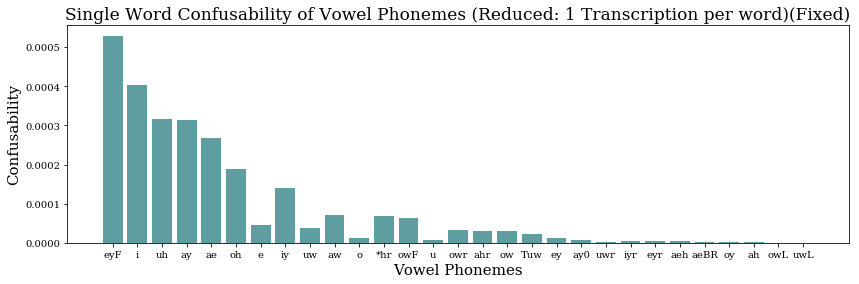

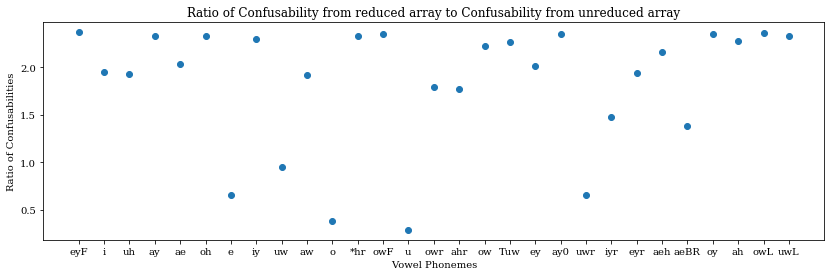

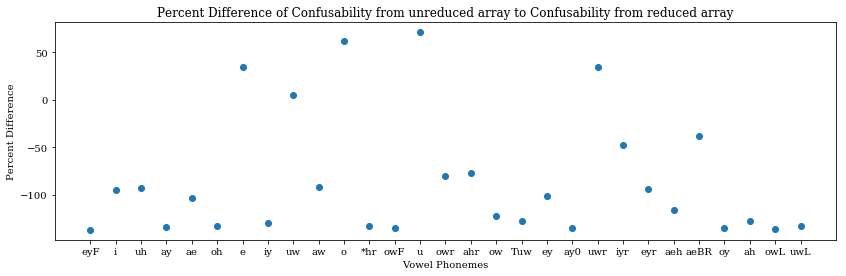

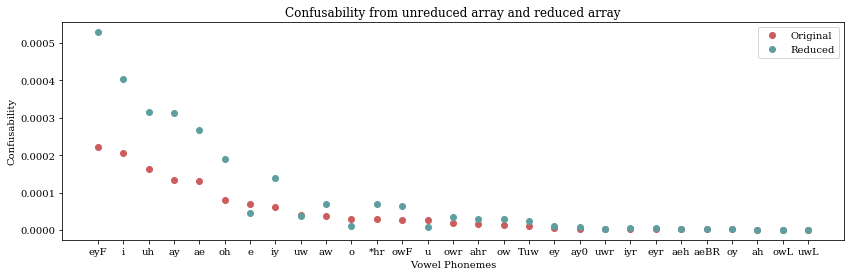

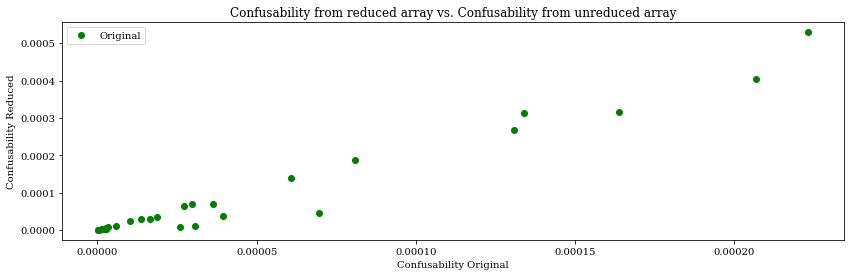

In [228]:
# LOADING CONFUSABILITY FILE AND MAKING BAR GRAPH
C_file_reduced = open("/Users/TaraD/LING_Research/Confus_Single_Words_reduced.txt", 'r')
Confus_reduced = C_file_reduced.read().split('\n\n')
print(np.shape(Confus_reduced))
print(type(Confus_reduced))
#print(Confus)
Confus_list_reduced = []
for i in Confus_reduced[:-1]:
    list1 = (i.split(' : '))
    list2 = [list1[0], float(list1[1])]
    Confus_list_reduced.append(list2)
Confus_array_reduced = (np.array(Confus_list_reduced))

#for i in Confus_array:
    #print(len(i),i)
print(Confus_array_reduced)
print(np.shape(Confus_array_reduced),np.shape(Confus_array))
print(Confus_array)
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.edgecolor'] = 'b'
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize = (14,4))
ind = np.argsort(Confus_array[:,1].astype(float))
x = np.take_along_axis(Confus_array[:,0],ind, axis=0)
y = np.take_along_axis(Confus_array[:,1].astype(float),ind, axis=0)
#C_sorted = sorted(C)[::-1]
#ind_red = np.argsort(Confus_array_reduced[:,1].astype(float))
x_red = np.take_along_axis(Confus_array_reduced[:,0],ind, axis=0)
y_red = np.take_along_axis(Confus_array_reduced[:,1].astype(float),ind, axis=0)

plt.bar(x_red[::-1], y_red[::-1], .8, color = 'cadetblue')
plt.title("Single Word Confusability of Vowel Phonemes (Reduced: 1 Transcription per word)(Fixed)", fontsize=17)
plt.xlabel('Vowel Phonemes', fontsize=15)
plt.ylabel('Confusability', fontsize=15)#plt.xticks
plt.show()



plt.figure(figsize=(14,4))
#plt.plot(Confus_array_reduced[:,0],(Confus_array_reduced[:,1]/Confus_array[:,1]),'o')
plt.plot(x[::-1],y_red[::-1]/y[::-1],'o')
plt.title("Ratio of Confusability from reduced array to Confusability from unreduced array")
plt.xlabel('Vowel Phonemes')
plt.ylabel('Ratio of Confusabilities')
plt.show()
plt.figure(figsize=(14,4))
#plt.plot(Confus_array_reduced[:,0],((Confus_array[:,1]-Confus_array_reduced[:,1])/Confus_array[:,1]),'o')
plt.plot(x[::-1],100*(y[::-1]-y_red[::-1])/y[::-1],'o')
plt.title("Percent Difference of Confusability from unreduced array to Confusability from reduced array")
plt.xlabel('Vowel Phonemes')
plt.ylabel('Percent Difference')
plt.show()

plt.figure(figsize=(14,4))
#plt.plot(Confus_array_reduced[:,0],((Confus_array[:,1]-Confus_array_reduced[:,1])/Confus_array[:,1]),'o')
plt.plot(x[::-1],y[::-1],'o', c='indianred', label='Original')
plt.plot(x_red[::-1], y_red[::-1],'o', c='cadetblue', label='Reduced')
plt.title("Confusability from unreduced array and reduced array")
plt.xlabel('Vowel Phonemes')
plt.ylabel('Confusability')
plt.legend()
plt.show()

plt.figure(figsize=(14,4))
#plt.plot(Confus_array_reduced[:,0],((Confus_array[:,1]-Confus_array_reduced[:,1])/Confus_array[:,1]),'o')
plt.plot(y[::-1],y_red[::-1],'o', c='g', label='Original')
#plt.plot(x_red[::-1], y_red[::-1],'o', c='cadetblue', label='Reduced')
plt.title("Confusability from reduced array vs. Confusability from unreduced array")
plt.xlabel('Confusability Original')
plt.ylabel('Confusability Reduced')
plt.legend()
plt.show()

(2, 26) (26,)


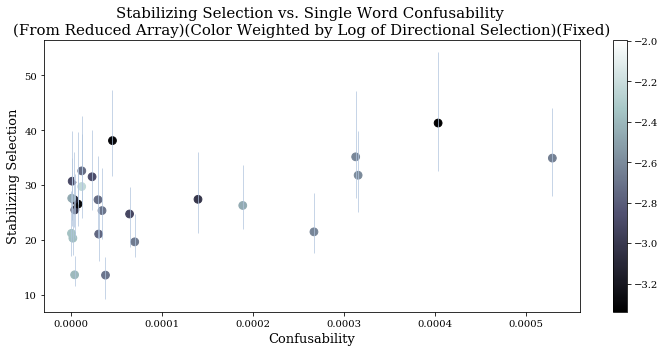

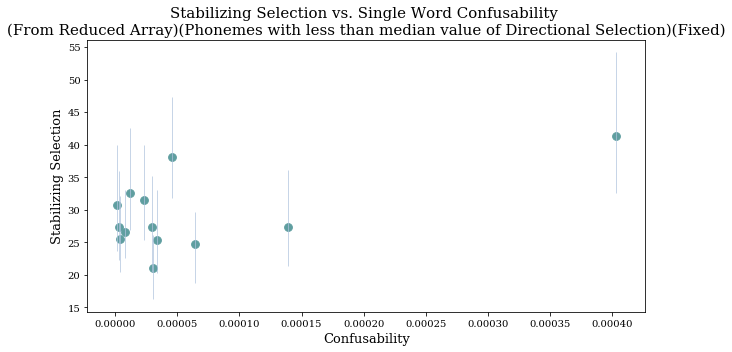

In [230]:
#PLOTTING STABILIZING SELECTION AND CONFUSABILITY ETC
stabsel_values = stabsel[1:,1:].astype(float)
#print(stabsel_values)
Confus_values_reduced = Confus_array_reduced[:,1].astype(float)
dr_values = driverate[1:,1:].astype(float)
#print(dr_values)
y = stabsel_values[:,0]
yl = stabsel_values[:,1]
y2 = stabsel_values[:,2]
yerr = stabsel_values[:,1:]
#print(yerr)
yerr1=yerr
yerr1[:,0] = yerr[:,0]-y[:]
yerr1[:,1] = yerr[:,1]-y[:]
yerr1 = yerr1.T
print(np.shape(yerr1), np.shape(z))
#print(yerr1)
#print(len(stabsel_values), len(y))
#print(stabsel_values, y)
x = np.zeros((len(y)))
z = np.zeros((len(y)))
for i in range(0,len(y)):
    phoneme = stabsel[i+1,0]
    index = np.where(Confus_array_reduced[:,0]==phoneme)[0]
    index_dr = np.where(driverate[:,0]==phoneme)[0]
    
    #print(index)
    x[i] = Confus_values_reduced[index]
    z[i] = dr_values[index_dr-1,0]
z_median = np.median(z)
x_masked = x[z < z_median]
z_masked = z[z < z_median]
y_masked = y[z < z_median]
yerr1_masked = (yerr1.T[z < z_median]).T
#x = np.array(x)
#print(y)
#print(x)
#print(z)
#print(min(x), max(x), min(y), max(y))
#print(yerr1)
#print(np.shape(yerr1))
plt.figure(figsize=(12,5))
plt.errorbar(x,y, yerr=abs(yerr1), linestyle="None", c = 'lightsteelblue', elinewidth=.7)
plt.scatter(x,y, c = np.log10(z), cmap = 'bone', s=60)
plt.colorbar()
plt.title('Stabilizing Selection vs. Single Word Confusability \n(From Reduced Array)(Color Weighted by Log of Directional Selection)(Fixed)', fontsize = 15)
#print("yerr1[1]", yerr1)
plt.xlabel('Confusability', fontsize=13)
plt.ylabel('Stabilizing Selection', fontsize=13)
#plt.ylim()
plt.show()

plt.figure(figsize=(10,5))
plt.errorbar(x_masked,y_masked, yerr=abs(yerr1_masked), linestyle="None", c = 'lightsteelblue', elinewidth=.7)
plt.scatter(x_masked,y_masked, c = 'cadetblue', s=60)
#plt.colorbar()
plt.title('Stabilizing Selection vs. Single Word Confusability \n(From Reduced Array)(Phonemes with less than median value of Directional Selection)(Fixed)', fontsize = 15)
#print("yerr1[1]", yerr1)
plt.xlabel('Confusability', fontsize=13)
plt.ylabel('Stabilizing Selection', fontsize=13)
#plt.ylim()
plt.show()



In [211]:
#CHECKING STRESSED VOWEL SUM COUNTS FOR BOTH FULL AND REDUCED (e.1 corrected again)

V_sum_counts = []
for i in range(len(V)):
    vi = V[i]
    vi_1 = ' ' + vi + '.1'
    vi_sum_counts = 0
    print("VOWEL IS",vi)
    for n in range(len(T_Nt_array[:])):
        t = T_Nt_array[n,0]
        t_alt = ' '+ t
        if vi_1 in t_alt:
            Nt = float(T_Nt_array[n,1])
            #print(t,Nt)
            vi_sum_counts += Nt
    V_sum_counts.append(vi_sum_counts)
print(V_sum_counts)
        
print('moving to reduced')
V_sum_counts_reduced = []
for i in range(len(V)):
    vi = V[i]
    vi_1 = ' ' + vi + '.1'
    vi_sum_counts_reduced = 0
    print("VOWEL IS",vi)
    for n in range(len(T_Nt_array_reduced[:])):
        t = T_Nt_array[n,0]
        t_alt = ' ' + t
        if vi_1 in t_alt:
            Nt = float(T_Nt_array_reduced[n,1])
            #print(t,Nt)
            vi_sum_counts_reduced += Nt
    V_sum_counts_reduced.append(vi_sum_counts_reduced)
print(V_sum_counts_reduced)
        
        

VOWEL IS owr
VOWEL IS e
VOWEL IS i
VOWEL IS ow
VOWEL IS eyF
VOWEL IS ay0
VOWEL IS ey
VOWEL IS o
VOWEL IS ae
VOWEL IS uh
VOWEL IS oh
VOWEL IS ahr
VOWEL IS iy
VOWEL IS aeh
VOWEL IS ay
VOWEL IS Tuw
VOWEL IS aeBR
VOWEL IS aw
VOWEL IS *hr
VOWEL IS uw
VOWEL IS eyr
VOWEL IS owL
VOWEL IS uwr
VOWEL IS owF
VOWEL IS iyr
VOWEL IS oy
VOWEL IS u
VOWEL IS ah
VOWEL IS uwL
[14811393.0, 44877567.0, 59948607.0, 12429515.0, 14697214.0, 5268790.0, 19526288.0, 17770768.0, 39396515.0, 64180362.0, 13198896.0, 8139320.0, 27745690.0, 7159750.0, 19090222.0, 19294058.0, 5906729.0, 9987659.0, 11444055.0, 9315412.0, 4493550.0, 1872439.0, 2068141.0, 4194737.0, 3591906.0, 1695686.0, 7837069.0, 313753.0, 789413.0]
moving to reduced
VOWEL IS owr
VOWEL IS e
VOWEL IS i
VOWEL IS ow
VOWEL IS eyF
VOWEL IS ay0
VOWEL IS ey
VOWEL IS o
VOWEL IS ae
VOWEL IS uh
VOWEL IS oh
VOWEL IS ahr
VOWEL IS iy
VOWEL IS aeh
VOWEL IS ay
VOWEL IS Tuw
VOWEL IS aeBR
VOWEL IS aw
VOWEL IS *hr
VOWEL IS uw
VOWEL IS eyr
VOWEL IS owL
VOWEL IS uwr
VOWEL 

## CHECKING/COMPARING RESULTS TO OLD CONFUSABILITY DEFINITION ETC

In [112]:
'''
# RUNNING OLD CONFUSABILITY DENOMINATORS


V = vowel_phoneme_list
C_OLD = np.zeros((len(V))) # Confusability Matrix
T = T_Nt_array[:,0]
print("V=",V)

# CALCULATING NTOT
Ntot_list = []
for i in range(len(T)):
    t = T[i]  #transcription
    Nt = float(T_Nt_array[i,1])
    Ntot_list.append(Nt)
Ntot = float(sum(Ntot_list))
print("Ntot=", Ntot)

Nvi_list = []
for h in range(len(V)):
    vi = V[h]
    #print("vi=",vi)
    vi_1 = vi + '.1'
    list_to_sum = []
    for i in range(len(T)):
        t = T[i]  #transcription
        Nt = float(T_Nt_array[i,1]) #token count of transcription in COCA
        if vi_1 in t:
            d = 1
            #print(w, Nw)
        else:
            d = 0
        term = (d*Nt)
        list_to_sum.append(term)
    Nvi = float(sum(list_to_sum))
    Nvi_list.append(Nvi)
print("Nvi_list:", Nvi_list)

t0 = time.time()
# CONFUSABILITY CALCULATION
for i in range(len(V)):
    vi = V[i]
    print("vi=",vi)
    vi_1 = vi + '.1'
    V_altered = [x for x in V if x != vi]
    #V_altered.remove(vi)
    print("vi, V_altered:", vi, V_altered)
    Nvi = Nvi_list[i]
    print("Nvi=", Nvi)

    # FIRST SUM
    Tlist_to_sum = []
    for n in range(len(T[:])):
        t = T[n]  #transcription
        if vi_1 in t:
            d = 1
        else:
            continue
        Nt = float(T_Nt_array[n,1]) #token count of transcription in COCA
        coeff = (d*Nt)/Nvi
        
        # SECOND SUM
        Vjlist_to_sum = []
        for j in range(len(V_altered)):
            vj = V_altered[j]
            vj_1 = vj + '.1'
            t_vj = t.replace(vi_1, vj_1, 1)
            if t_vj in T:
                index = [i for i in range(len(T)) if T[i]==t_vj]
                Nt_vj = T_Nt_array[index,1].astype(float)[0] #float
                #print(t,t_vj,Nt_vj, type(Nt_vj))
            else:
                Nt_vj = 0
            inner_term = Nt_vj/(Ntot-Nvi)
            #print("inner term", inner_term)
            Vjlist_to_sum.append(inner_term)
        
        SumVj = sum(Vjlist_to_sum)
        term = coeff*SumVj
        Tlist_to_sum.append(term)
    SumT = sum(Tlist_to_sum)
    C_OLD[i] = SumT
print("Confusability = ", C)
print("time=", time.time()-t0)
'''

V= ['owr', 'e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Ntot= 621067731.0
Nvi_list: [14811393.0, 84273854.0, 59948607.0, 12429515.0, 14697214.0, 5268790.0, 19526288.0, 17770768.0, 39396515.0, 64180362.0, 13198896.0, 8139320.0, 27745690.0, 7159750.0, 19090222.0, 19294058.0, 5906729.0, 9987659.0, 11444055.0, 28609470.0, 4493550.0, 1872439.0, 2068141.0, 4194737.0, 3591906.0, 1695686.0, 7837069.0, 313753.0, 789413.0]
vi= owr
vi, V_altered: owr ['e', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Nvi= 14811393.0
vi= e
vi, V_altered: e ['owr', 'i', 'ow', 'eyF', 'ay0', 'ey', 'o', 'ae', 'uh', 'oh', 'ahr', 'iy', 'aeh', 'ay', 'Tuw', 'aeBR', 'aw', '*hr', 'uw', 'eyr', 'owL', 'uwr', 'owF', 'iyr', 'oy', 'u', 'ah', 'uwL']
Nvi= 84273854.0
vi= i
vi

In [113]:
print(C_OLD)

[8.09323531e-04 5.93090201e-04 2.37240413e-03 6.92119403e-04
 9.66200594e-03 3.97050440e-04 1.88117109e-04 1.09925046e-03
 2.20407183e-03 1.76774536e-03 3.89494193e-03 1.28544385e-03
 1.42258369e-03 1.51648381e-04 4.49650690e-03 3.35671638e-04
 1.45592291e-04 2.29692977e-03 1.64209161e-03 8.99685056e-04
 3.55198419e-04 7.88987729e-05 8.30486686e-04 4.07050865e-03
 4.68547808e-04 4.85942564e-04 2.07564170e-03 9.32040105e-04
 1.01854278e-04]


In [127]:
'''
#NTOT DIFFERENT??
Ntot_list1 = []
T = T_Nt_array[:,0]

for i in range(len(T)):
    t = T[i]  #transcription
    Nt = float(T_Nt_array[i,1])
    if Nt ==358247:
        print('found t,',t,Nt)
    Ntot_list1.append(Nt)
Ntot1 = float(sum(Ntot_list1))
print("Ntot1=", Ntot)

Ntot_list2 = []
W = word_pron_count[:,1]

for i in range(len(W)):
    w = W[i]  #transcription
    Nt = float(word_pron_count[i,2])
    if Nt ==358247:
        print('found t,',t,Nt)
    Ntot_list2.append(Nt)
Ntot2 = float(sum(Ntot_list2))
print("Ntot2=", Ntot2)
print(len(word_pron_count), len(T_Nt_array))
'''

Ntot1= 621067731.0
Ntot2= 620709484.0
64037 57712


In [137]:
'''
#CHECKING DIFF
t0 = time.time()
T_Nt_list2 = []#['Transcription', 'Count Sum', 'Homophone Count', 'Homophone Info']
for i in range(len(word_pron_count[:5])):
    if i%100 == 0:
        print(i)
    word = word_pron_count[i,0]
    trans = word_pron_count[i,1]
    count = word_pron_count[i,2]
    #if len(T_Nt_list) > 1:
    #print((np.array(T_Nt_list)))
    if not any(trans in x for x in np.array(T_Nt_list2)):#trans not in (np.array(T_Nt_list)):
        indices = np.where(word_pron_count==trans)[0]
        #print(indices)

        if len(indices) == 1:
            list1 = [trans, count.astype(float), 1, word+':'+count]

        else:
            arr = word_pron_count[indices,:]
            words = word_pron_count[indices,0]
            counts = word_pron_count[indices,2]
            term = np.apply_along_axis(lambda d: d[0]+':'+d[2], 1,arr)
            info = (','.join(term))
            homophone_count = len(indices)
            count_sum = sum(counts.astype(float))
            list1 = [trans, count_sum, homophone_count, info]
    else:
        #print('skipped', trans)
        continue
    
    T_Nt_list2.append(list1)
T_Nt_array2 = np.array(T_Nt_list2)
#for line in T_Nt_array:
    #print(line)    
        
print(len(T_Nt_array2))
print("time=", time.time()-t0)
#np.savetxt('Trans_count_info.txt', T_Nt_array, fmt = '%s', delimiter = ',')
T2 = T_Nt_array2[:,0]        
Ntot_list1 = []
for i in range(len(T2)):
    t = T2[i]  #transcription
    Nt = float(T_Nt_array2[i,1])
    
    Ntot_list1.append(Nt)
    print(i, t, Nt)
Ntot1 = float(sum(Ntot_list1))
print("Ntot1=", Ntot1)

Ntot_list2 = []
W = word_pron_count[:5,1]

for i in range(len(W)):
    w = W[i]  #transcription
    Nt = float(word_pron_count[i,2])
    
    Ntot_list2.append(Nt)
    print(i, w, Nt)
Ntot2 = float(sum(Ntot_list2))
print("Ntot2=", Ntot2)
'''

0
5
time= 0.03813505172729492
0 K @.0 Z 54548.0
1 K owr.1 R S 157591.0
2 e.1 N D i.1 N *hr.0 K W ow.1 T 0.0
3 e.1 N D K W ow.1 T 0.0
4 i.1 N *hr.0 K W ow.1 T 0.0
Ntot1= 212139.0
0 K @.0 Z 0.0
1 K owr.1 R S 0.0
2 e.1 N D i.1 N *hr.0 K W ow.1 T 0.0
3 e.1 N D K W ow.1 T 0.0
4 i.1 N *hr.0 K W ow.1 T 0.0
Ntot2= 0.0


In [131]:
print(T_Nt_list2)

[]
